### Neshyba 2023


# Linear Combination of Atomic Orbitals

## Introduction



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sympy as sp
from sympy.physics.hydrogen import Psi_nlm
from sympy import Symbol, lambdify, symbols, exp

In [2]:
%matplotlib notebook

In [3]:
# Shape of the Cartesian box
yzlen = 5
xlen = 1.5*yzlen; print(xlen)
aspect_ratio = xlen/yzlen; print('aspect =', aspect_ratio)
yznum = 34
xnum = int(xlen/yzlen)*yznum; print(xnum)
symbolsize = 10
scale = 0.12
bonddistance = 1.165/0.529 # This is in bohr
print('bond distance =',bonddistance)
x = np.linspace(-xlen,xlen,xnum)
y = np.linspace(-yzlen,yzlen,yznum)
z = np.linspace(-yzlen,yzlen,yznum)
xgrid, ygrid, zgrid = np.meshgrid(x,y,z)
print(np.shape(xgrid))
print(np.shape(ygrid))
print(np.shape(zgrid))

# Getting the grid in spherical polar coordinates
rgrid = (xgrid**2+ygrid**2+zgrid**2)**.5; print(np.shape(rgrid),np.size(rgrid))
thetagrid = np.arccos(zgrid/rgrid); print(np.shape(thetagrid),np.size(thetagrid))
phigrid = np.arctan2(ygrid,xgrid); print(np.shape(phigrid),np.size(phigrid))

# Zeffective (average of carbon and oxygen)
Zeff_C = 4
Zeff_O = 6

7.5
aspect = 1.5
34
bond distance = 2.2022684310018903
(34, 34, 34)
(34, 34, 34)
(34, 34, 34)
(34, 34, 34) 39304
(34, 34, 34) 39304
(34, 34, 34) 39304


In [4]:
def getpsi(n,l,m,xgrid,ygrid,zgrid,Zeff,xshift=0):
    
    xgrid_shifted = xgrid-xshift
    rgrid = ((xgrid_shifted)**2+ygrid**2+zgrid**2)**.5; #print(np.shape(rgrid),np.size(rgrid))
    thetagrid = np.arccos(zgrid/rgrid); #print(np.shape(thetagrid),np.size(thetagrid))
    phigrid = np.arctan2(ygrid,xgrid-xshift); #print(np.shape(phigrid),np.size(phigrid))

    r=Symbol("r", positive=True)
    phi=Symbol("phi", real=True)
    theta=Symbol("theta", real=True)
    Z=Symbol("Z", positive=True, nonzero=True)

    psi_analytical = Psi_nlm(n,l,m, r, phi, theta, Z)
    sp.pprint(psi_analytical)
    psi_numerical = lambdify([r,theta,phi,Z], psi_analytical, 'numpy')
    psi = psi_numerical(rgrid,thetagrid,phigrid,Zeff)
    return psi

In [5]:
def normalizer(x,y,z,psi,tolerance=0.01):
    psi2 = abs(psi)**2
    dv = (x[1]-x[0])*(y[1]-y[0])*(z[1]-z[0])
    print(np.shape(psi2))
    N = np.sum(psi2)*dv
    if (abs(N-1)<tolerance):
        print('Congratulations, that wave function was already normalized')
    else:
        print('Normalizing by ', N)
        psi /= N
    return psi

              -Z⋅r         
              ─────        
  5/2    ⅈ⋅φ    2          
-Z   ⋅r⋅ℯ   ⋅ℯ     ⋅sin(θ) 
───────────────────────────
            8⋅√π           


<IPython.core.display.Javascript object>


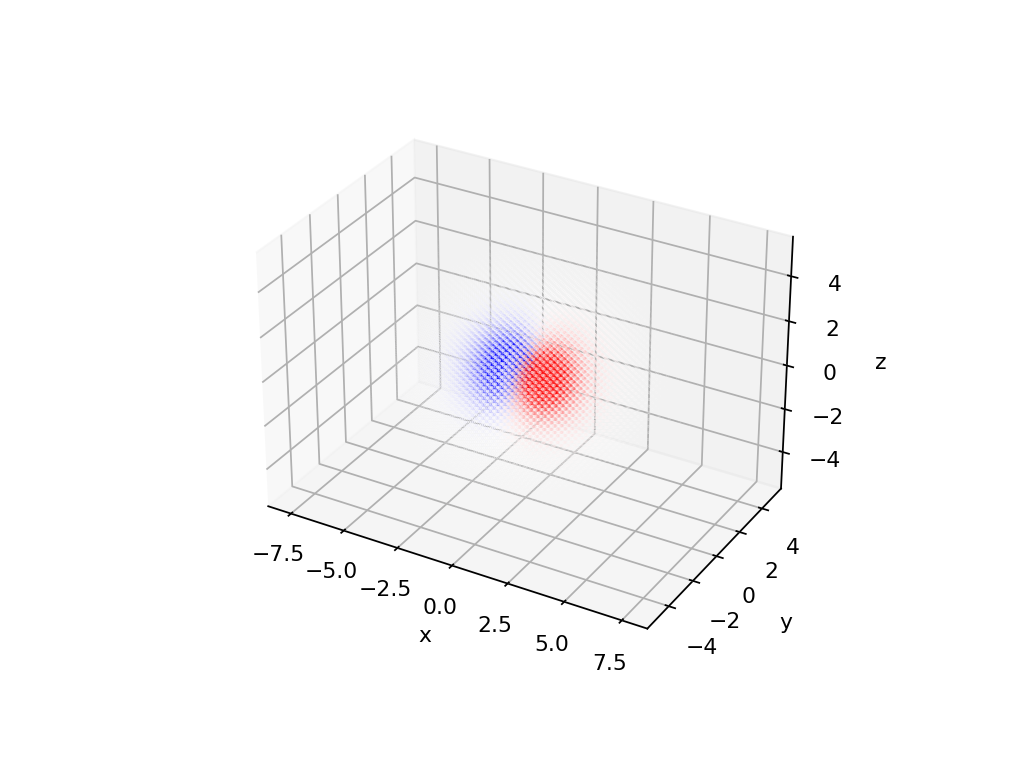

(34, 34, 34)
Congratulations, that wave function was already normalized


In [6]:
# Construct 2Px on the carbon
psi = getpsi(2,1,1,xgrid,ygrid,zgrid,Zeff_C)
fig = plt.figure('2,1,1')
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect = (aspect_ratio,1,1))
ax.scatter(xgrid,ygrid,zgrid, s=np.abs(psi)*symbolsize, c=np.real(psi), vmin=-scale, vmax=scale, cmap="bwr_r")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
psi = normalizer(x,y,z,psi)
psi_211 = psi

                    -Z⋅r 
                    ─────
    3/2               2  
√2⋅Z   ⋅(-Z⋅r + 2)⋅ℯ     
─────────────────────────
           8⋅√π          


<IPython.core.display.Javascript object>


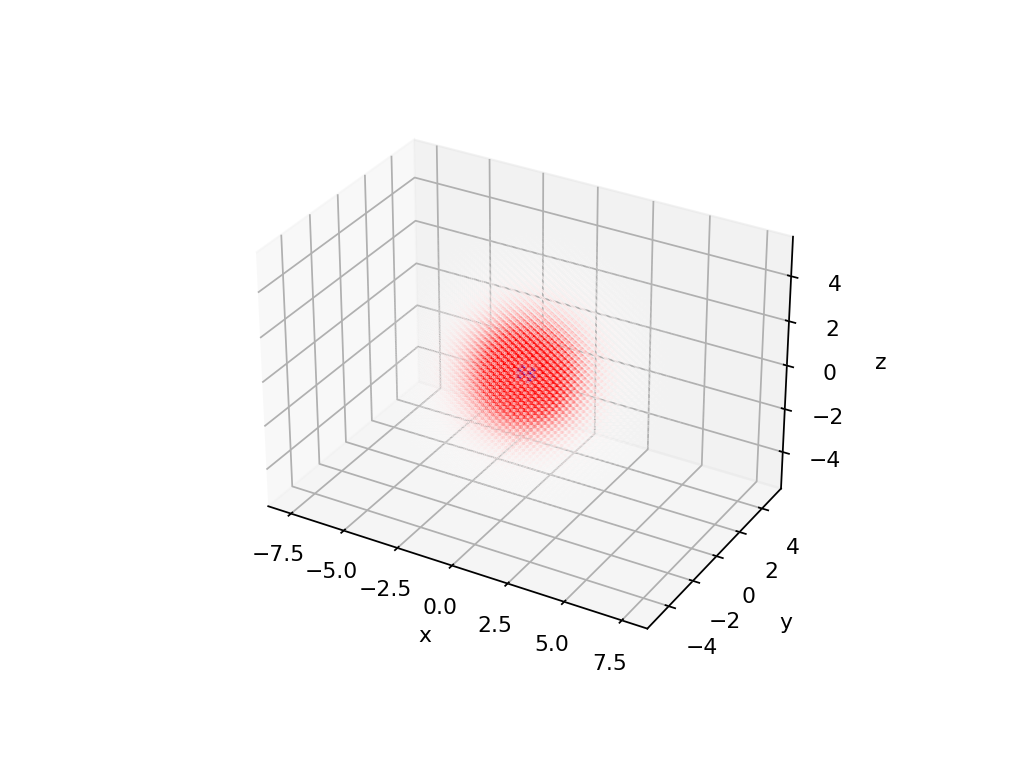

(34, 34, 34)
Normalizing by  0.9817372975717777


In [7]:
# Construct 2s on the carbon
psi = getpsi(2,0,0,xgrid,ygrid,zgrid,Zeff_C)
fig = plt.figure('2,0,0')
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect = (aspect_ratio,1,1))
ax.scatter(xgrid,ygrid,zgrid, s=np.abs(psi)*symbolsize, c=np.real(psi), vmin=-scale, vmax=scale, cmap="bwr_r")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
psi = normalizer(x,y,z,psi)
psi_200 = psi

<IPython.core.display.Javascript object>


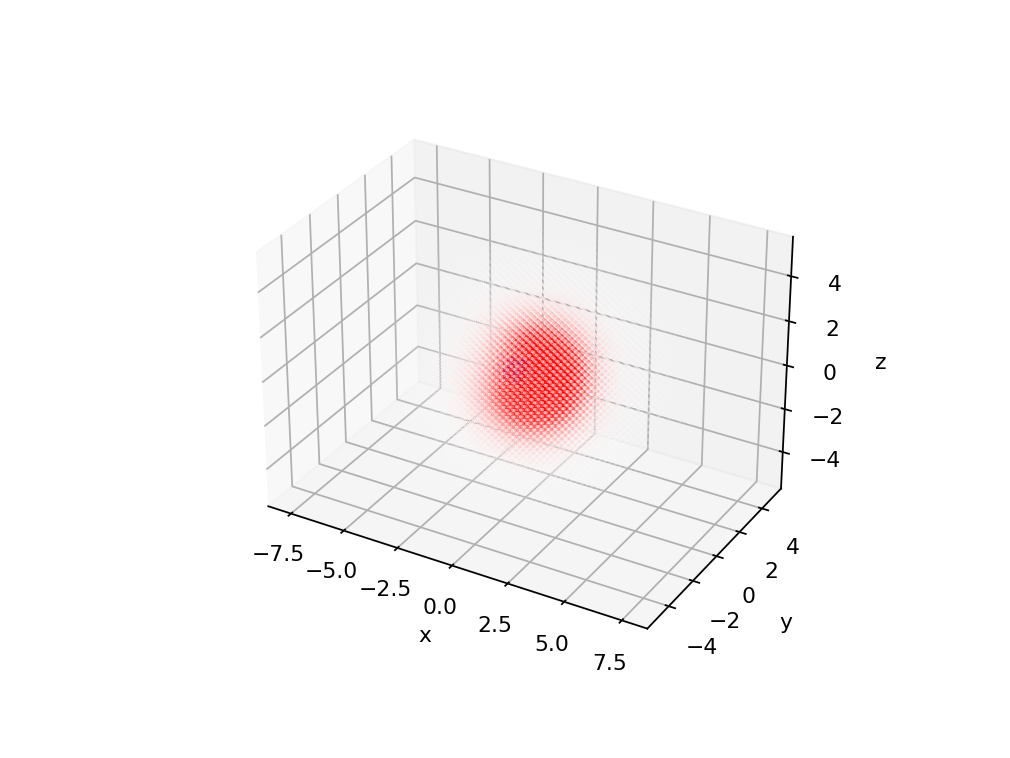

(34, 34, 34)
Normalizing by  2.020192916101587


In [8]:
# Construct sp on the carbon
psi = psi_200+psi_211
fig = plt.figure('sp+')
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect = (aspect_ratio,1,1))
ax.scatter(xgrid,ygrid,zgrid, s=np.abs(psi)*symbolsize, c=np.real(psi), vmin=-scale, vmax=scale, cmap="bwr_r")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
psi = normalizer(x,y,z,psi)
psi_sp_right = psi

<IPython.core.display.Javascript object>


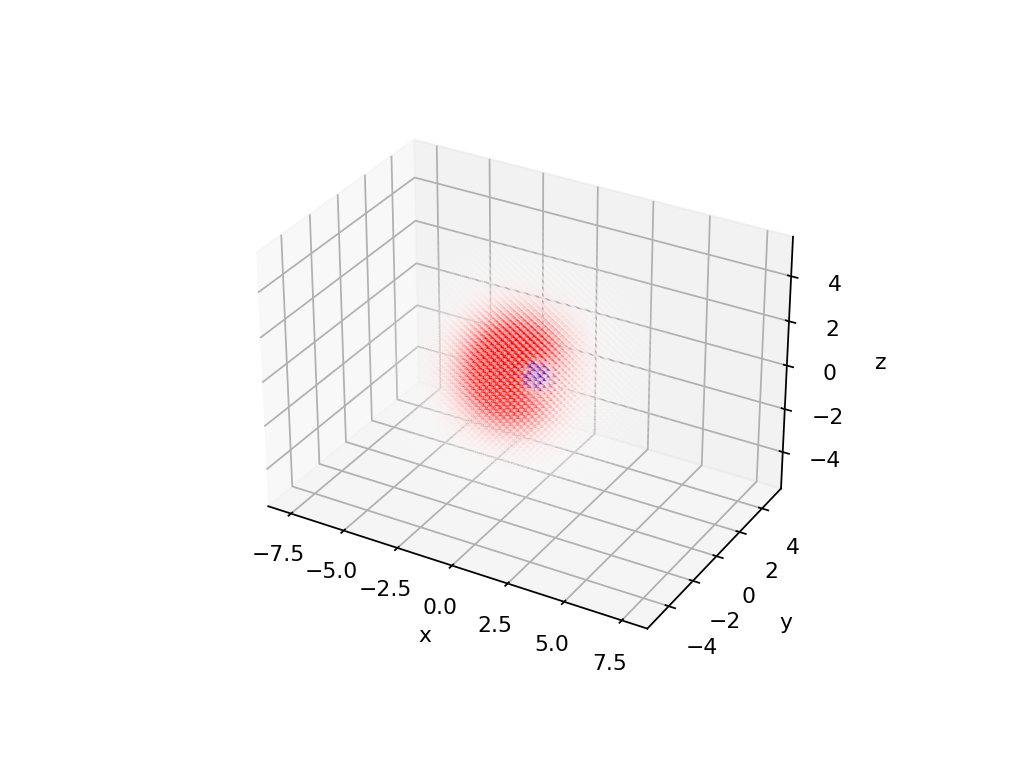

(34, 34, 34)
Normalizing by  2.0201929161015872


In [9]:
# Construct the other sp on the carbon
psi = psi_200-psi_211
fig = plt.figure('sp-')
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect = (aspect_ratio,1,1))
ax.scatter(xgrid,ygrid,zgrid, s=np.abs(psi)*symbolsize, c=np.real(psi), vmin=-scale, vmax=scale, cmap="bwr_r")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
psi = normalizer(x,y,z,psi)
psi_sp_left = psi

                    -Z⋅r 
                    ─────
    3/2               2  
√2⋅Z   ⋅(-Z⋅r + 2)⋅ℯ     
─────────────────────────
           8⋅√π          


<IPython.core.display.Javascript object>


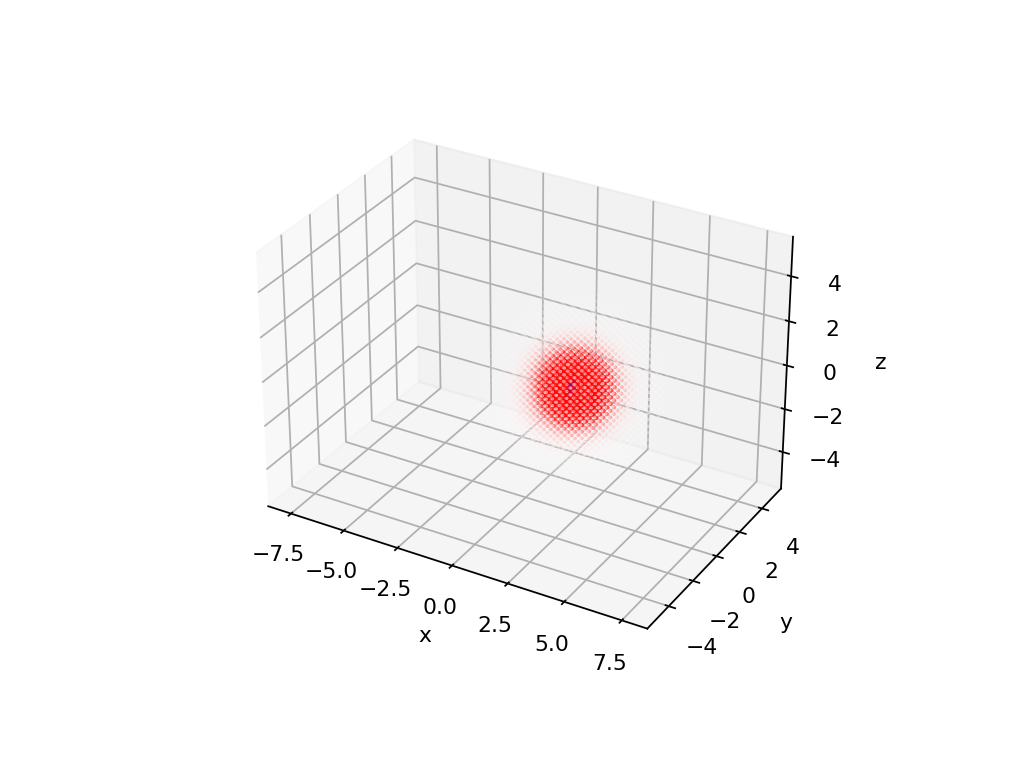

(34, 34, 34)
Normalizing by  0.9590728643625589


In [10]:
# Construct 2s on an oxygen
psi = getpsi(2,0,0,xgrid,ygrid,zgrid,Zeff_O,bonddistance)
fig = plt.figure('2,0,0 on rightt-hand oxygen')
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect = (aspect_ratio,1,1))
ax.scatter(xgrid,ygrid,zgrid, s=np.abs(psi)*symbolsize, c=np.real(psi), vmin=-scale, vmax=scale, cmap="bwr_r")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
psi = normalizer(x,y,z,psi)
psi_200_Oxygen_right = psi

                    -Z⋅r 
                    ─────
    3/2               2  
√2⋅Z   ⋅(-Z⋅r + 2)⋅ℯ     
─────────────────────────
           8⋅√π          


<IPython.core.display.Javascript object>


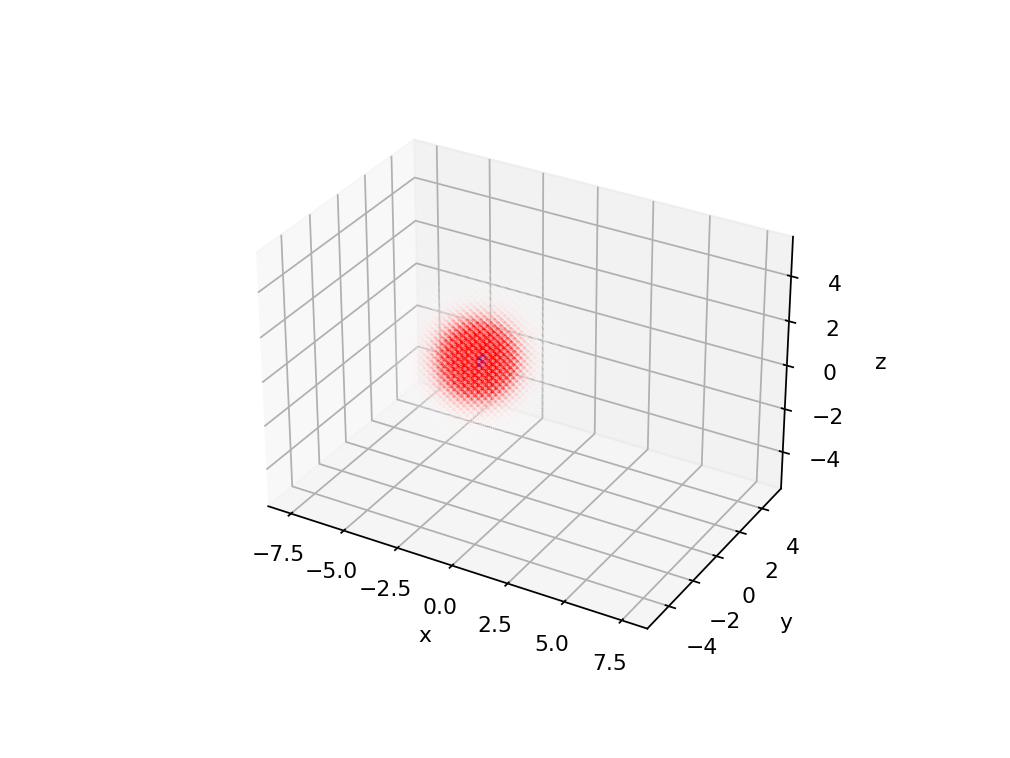

(34, 34, 34)
Normalizing by  0.9590728643625592


In [11]:
# Construct 2s on an oxygen
psi = getpsi(2,0,0,xgrid,ygrid,zgrid,Zeff_O,-bonddistance)
fig = plt.figure('2,0,0 on left-hand oxygen')
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect = (aspect_ratio,1,1))
ax.scatter(xgrid,ygrid,zgrid, s=np.abs(psi)*symbolsize, c=np.real(psi), vmin=-scale, vmax=scale, cmap="bwr_r")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
psi = normalizer(x,y,z,psi)
psi_200_Oxygen_left = psi

<IPython.core.display.Javascript object>


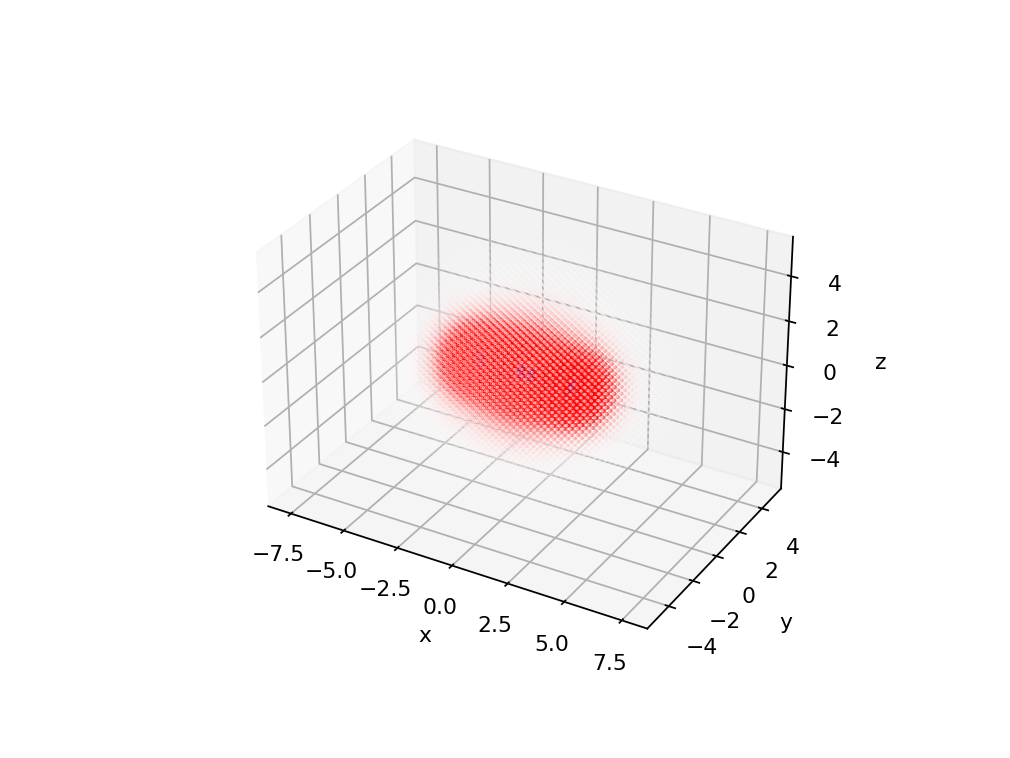

(34, 34, 34)
Normalizing by  4.439181119548405


In [12]:
# Construct a molecular orbital
psi = psi_200_Oxygen_left+psi_sp_left+psi_sp_right+psi_200_Oxygen_right
fig = plt.figure('DMO1')
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect = (aspect_ratio,1,1))
ax.scatter(xgrid,ygrid,zgrid, s=np.abs(psi)*symbolsize, c=np.real(psi), vmin=-scale, vmax=scale, cmap="bwr_r")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
psi = normalizer(x,y,z,psi)
psi_DMO1 = psi

<IPython.core.display.Javascript object>


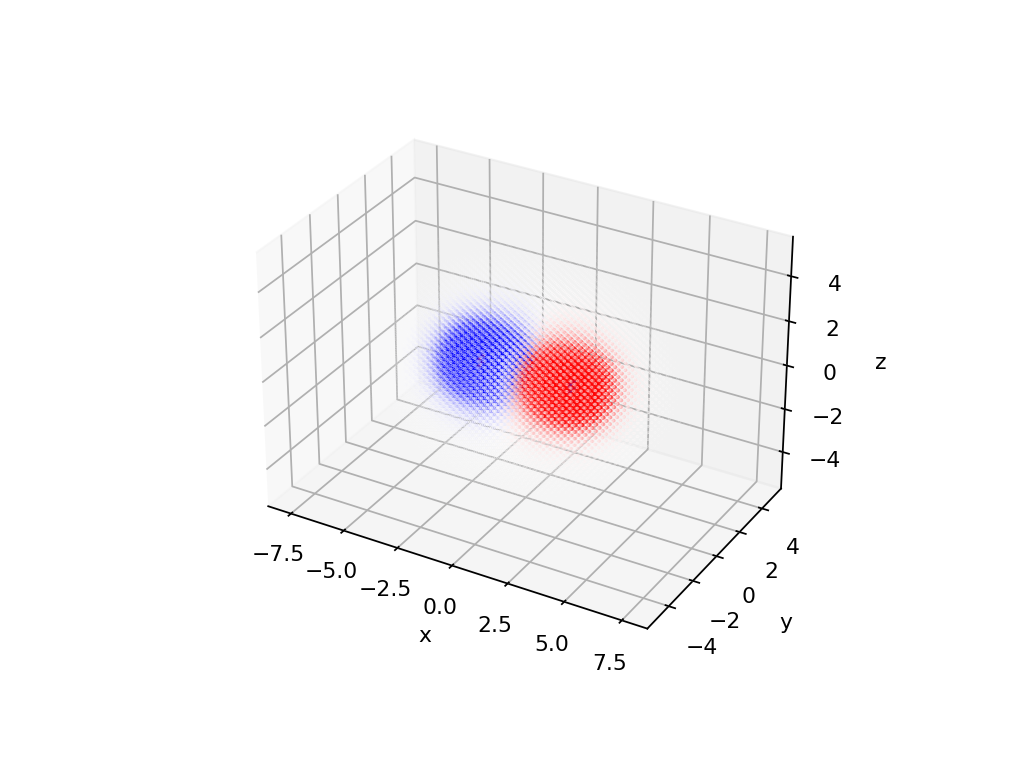

(34, 34, 34)
Normalizing by  4.126519806573604


<IPython.core.display.Javascript object>


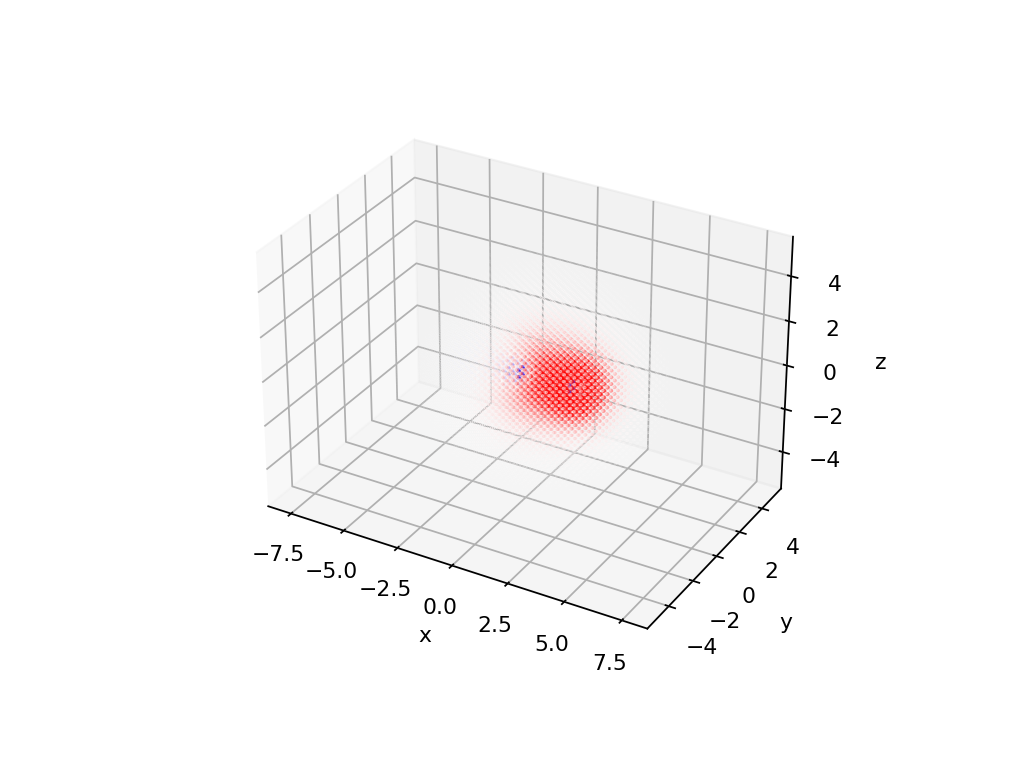

(34, 34, 34)
Normalizing by  0.46760172877450473


<IPython.core.display.Javascript object>


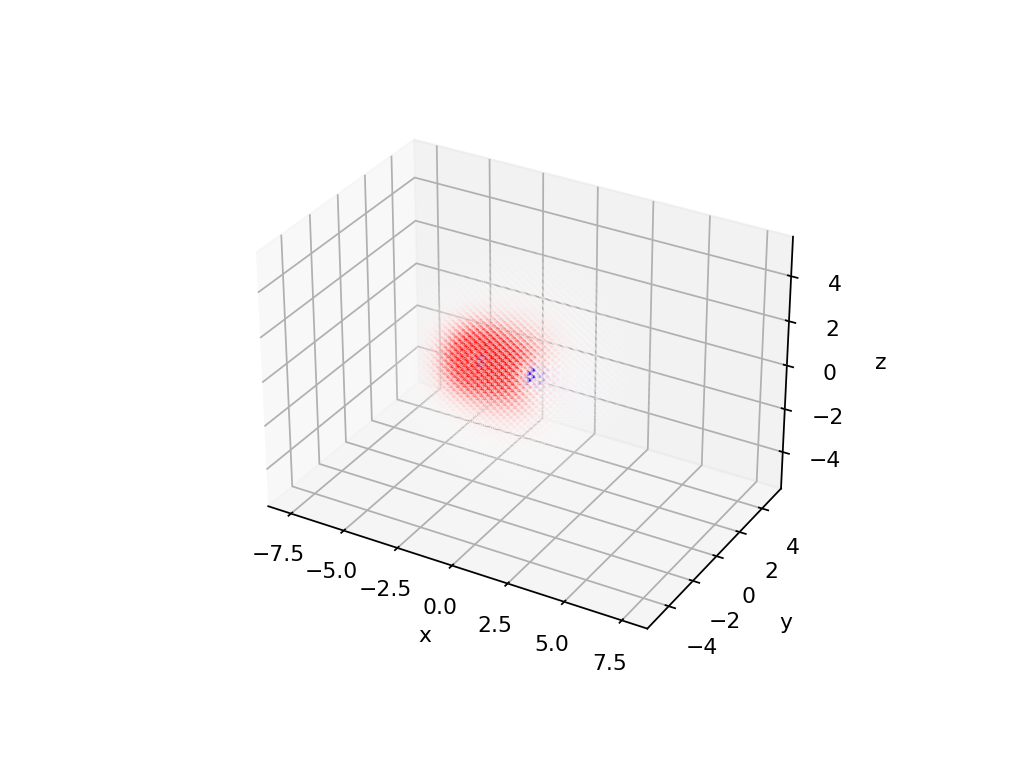

(34, 34, 34)
Normalizing by  0.4676017287745045


In [18]:
# Construct another molecular orbital
psi = psi_200_Oxygen_right+psi_sp_right-psi_sp_left-psi_200_Oxygen_left
fig = plt.figure('DMO2')
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect = (aspect_ratio,1,1))
ax.scatter(xgrid,ygrid,zgrid, s=np.abs(psi)*symbolsize, c=np.real(psi), vmin=-scale, vmax=scale, cmap="bwr_r")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
psi = normalizer(x,y,z,psi)
psi_DMO2 = psi

# The code below should not appear to students, it's just a test
# Construct an LMO
psi = psi_DMO1+psi_DMO2
fig = plt.figure('LMO1')
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect = (aspect_ratio,1,1))
ax.scatter(xgrid,ygrid,zgrid, s=np.abs(psi)*symbolsize, c=np.real(psi), vmin=-scale, vmax=scale, cmap="bwr_r")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
psi = normalizer(x,y,z,psi)
psi_LMO1 = psi

# Construct another LMO
psi = psi_DMO1-psi_DMO2
fig = plt.figure('LMO2')
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect = (aspect_ratio,1,1))
ax.scatter(xgrid,ygrid,zgrid, s=np.abs(psi)*symbolsize, c=np.real(psi), vmin=-scale, vmax=scale, cmap="bwr_r")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
psi = normalizer(x,y,z,psi)
psi_LMO1 = psi

In [17]:
# Saving
Iwanttosave = True
if Iwanttosave:
    print('saving')
    np.save('DMO1.txt',psi_DMO1)
    np.save('DMO2.txt',psi_DMO2)
    np.save('xgrid.txt',xgrid)
    np.save('ygrid.txt',ygrid)
    np.save('zgrid.txt',zgrid)

saving


### Refreshing and saving your code
1. Use the dropdown menu Kernel/Restart
2. Use the dropdown menu Cell/Run All Above
3. Under the "File" dropdown menu item in the upper left is a disk icon. Press it now to save your work (you can, do this at any time as you're working on an assignment, actually).

### Validating
This step will help ensure that you didn't miss something (although it's not a guarantee). Find the "Validate" button and press it. If there are any errors or warnings, fix them.

### Finishing up
Assuming all this has gone smoothly, carry out three more steps (but read this carefully before starting):
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page